# Week 2, Data Ingestion

Data requirements taken from: https://pypi.org/project/Fedtools/

In [1]:
!pip install Fedtools

from FedTools import MonetaryPolicyCommittee
from FedTools import BeigeBooks
from FedTools import FederalReserveMins

import pandas as pd

from sklearn.preprocessing import StandardScaler

Defaulting to user installation because normal site-packages is not writeable


In [2]:
fed_mins = FederalReserveMins(
            main_url = 'https://www.federalreserve.gov', 
            calendar_url ='https://www.federalreserve.gov/monetarypolicy/fomccalendars.htm',
            start_year = 1973,        
            historical_split = 2017,
            verbose = True,
            thread_num = 10)

dataset = fed_mins.find_minutes()

Constructing links between 1973 and 2023
Extracting Federal Reserve Minutes.
Retrieving articles.
..........................................................................................................................................................................................................................................................

In [3]:
dataset

,Federal_Reserve_Mins
1993-02-03,A meeting of the Federal Open Market Committee...
1993-03-23,A meeting of the Federal Open Market Committee...
1993-05-18,A meeting of the Federal Open Market Committee...
1993-07-07,A meeting of the Federal Open Market Committee...
1993-08-17,A meeting of the Federal Open Market Committee...
...,...
2022-11-02,"The Federal Reserve, the central bank of the U..."
2022-12-14,"The Federal Reserve, the central bank of the U..."
2023-02-01,"The Federal Reserve, the central bank of the U..."
2023-03-22,"The Federal Reserve, the central bank of the U..."


In [4]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abact\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abact\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\abact\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Python ingestion, cleaning and joining done in R, translated and troubleshot by ChatGPT 4

In [5]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join the preprocessed tokens back to a single string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply text preprocessing to the 'Minutes' column
dataset['Preprocessed Text'] = dataset['Federal_Reserve_Mins'].apply(preprocess_text)

In [6]:
dataset

,Federal_Reserve_Mins,Preprocessed Text
1993-02-03,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...
1993-03-23,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...
1993-05-18,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...
1993-07-07,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...
1993-08-17,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...
...,...,...
2022-11-02,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...
2022-12-14,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...
2023-02-01,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...
2023-03-22,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...


In [7]:
dataset['Date'] = dataset.index.date

In [8]:
dataset

,Federal_Reserve_Mins,Preprocessed Text,Date
1993-02-03,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-02-03
1993-03-23,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-03-23
1993-05-18,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-05-18
1993-07-07,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-07-07
1993-08-17,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-08-17
...,...,...,...
2022-11-02,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-11-02
2022-12-14,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-12-14
2023-02-01,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2023-02-01
2023-03-22,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2023-03-22


In [9]:
dataset.to_csv('C:/Users/abact/Desktop/dataset.csv')

In [10]:
date_column = dataset['Date']

# Create a new DataFrame with just the "date" column
date_data = pd.DataFrame(date_column)

# Save the "date" column as a CSV file
date_data.to_csv('date_column.csv', index=False)

In [11]:
# Save the "date" column as a CSV file
dataset.to_csv('minutes_data.csv', index=False)

Federal Reserve Open Market Operations seem to only exist on their website: https://www.federalreserve.gov/monetarypolicy/openmarket.htm
Had to download it manually and clean the dates and data

In [12]:
excel_file_path = r"C:\Users\abact\Documents\Fed Policy Action.xlsx"

# Read the Excel file into a pandas DataFrame
policy = pd.read_excel(excel_file_path)

# Print the data
print(policy)

          Date  Difference  Increase  Decrease  Level
0   1993-04-09       -0.25      0.00      0.25   3.75
1   1993-07-02       -0.50      0.00      0.50   3.25
2   1993-09-04       -0.25      0.00      0.25   3.00
3   1994-02-04        0.25      0.25      0.00   3.25
4   1994-03-22        0.25      0.25      0.00   3.50
..         ...         ...       ...       ...    ...
112 2022-11-01        0.75      0.75      0.00   4.00
113 2022-12-13        0.50      0.50      0.00   4.50
114 2023-01-31        0.25      0.25      0.00   4.75
115 2023-03-21        0.25      0.25      0.00   5.00
116 2023-05-02        0.25      0.25      0.00   5.25

[117 rows x 5 columns]


We merge the two dataframes in a right join to the existing dataset, since we want to later input data for "No policy change"

In [13]:
# Convert 'Date' column to datetime data type in both DataFrames
dataset['Date'] = pd.to_datetime(dataset['Date'])
policy['Date'] = pd.to_datetime(policy['Date'])

# Sort the 'dataset' DataFrame by 'Date'
dataset_sorted = dataset.sort_values('Date')

# Sort the 'policy' DataFrame by 'Date'
policy_sorted = policy.sort_values('Date')

# Perform the merge operation with sorted DataFrames, using 'Date' column and 5-day tolerance
merged_data = pd.merge_asof(dataset_sorted, policy_sorted, on='Date', tolerance=pd.Timedelta(days=5))

# Print the merged data
print(merged_data)

                                  Federal_Reserve_Mins  \
0    A meeting of the Federal Open Market Committee...   
1    A meeting of the Federal Open Market Committee...   
2    A meeting of the Federal Open Market Committee...   
3    A meeting of the Federal Open Market Committee...   
4    A meeting of the Federal Open Market Committee...   
..                                                 ...   
237  The Federal Reserve, the central bank of the U...   
238  The Federal Reserve, the central bank of the U...   
239  The Federal Reserve, the central bank of the U...   
240  The Federal Reserve, the central bank of the U...   
241  The Federal Reserve, the central bank of the U...   

                                     Preprocessed Text       Date  Difference  \
0    meeting federal open market committee held off... 1993-02-03         NaN   
1    meeting federal open market committee held off... 1993-03-23         NaN   
2    meeting federal open market committee held off... 1993-

We need to input data that shows no difference in rates when they had a meeting but not policy shift. We also need to input the target Federal Funds rate for meetings where there was no change (the last rate that was observed)

In [14]:
# Replace NA values in 'Difference', 'Increase', and 'Decrease' columns with zeroes
merged_data[['Difference', 'Increase', 'Decrease']] = merged_data[['Difference', 'Increase', 'Decrease']].fillna(0)

# Fill NA values in 'Level' column with value from the row above (forward fill)
merged_data['Level'] = merged_data['Level'].fillna(method='ffill')

merged_data['Level'] = merged_data['Level'].fillna(3.75)

merged_data

,Federal_Reserve_Mins,Preprocessed Text,Date,Difference,Increase,Decrease,Level
0,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-02-03,0.00,0.00,0.0,3.75
1,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-03-23,0.00,0.00,0.0,3.75
2,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-05-18,0.00,0.00,0.0,3.75
3,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-07-07,-0.50,0.00,0.5,3.25
4,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-08-17,0.00,0.00,0.0,3.25
...,...,...,...,...,...,...,...
237,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-11-02,0.75,0.75,0.0,4.00
238,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-12-14,0.50,0.50,0.0,4.50
239,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2023-02-01,0.25,0.25,0.0,4.75
240,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2023-03-22,0.25,0.25,0.0,5.00


In [15]:
na_counts = merged_data.isna().sum()

# Print the number of NA values in each column
print(na_counts)

Federal_Reserve_Mins    0
Preprocessed Text       0
Date                    0
Difference              0
Increase                0
Decrease                0
Level                   0
dtype: int64


In [16]:
!pip install fredapi
from fredapi import Fred
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable


In [17]:
fred = Fred(api_key='ada1a8ba0569ed784226f2c26db44ab1')

In [18]:
# Specify the series ID for the CPI data
cpi_series_id = 'CPIAUCSL'  # CPI All Items Index

# Fetch monthly CPI data from FRED starting from January 1, 1993
cpi_data = fred.get_series(cpi_series_id, start_date='1993-01-01', frequency='m')

# Create a DataFrame with the Date and CPI columns
cpi_df = pd.DataFrame({'Date': cpi_data.index, 'CPI': cpi_data.values})

# Print the DataFrame
print(cpi_df)

          Date      CPI
0   1947-01-01   21.480
1   1947-02-01   21.620
2   1947-03-01   22.000
3   1947-04-01   22.000
4   1947-05-01   21.950
..         ...      ...
912 2023-01-01  300.536
913 2023-02-01  301.648
914 2023-03-01  301.808
915 2023-04-01  302.918
916 2023-05-01  303.294

[917 rows x 2 columns]


In [19]:
# Specify the series ID for the real nonfarm payroll data
payroll_series_id = 'PAYEMS'  # All Employees: Total Nonfarm Payrolls

# Fetch monthly real nonfarm payroll data from FRED starting from January 1, 1993
payroll_data = fred.get_series(payroll_series_id, start_date='1993-01-01', frequency='m')

# Create a DataFrame with the Date and Nonfarm Payroll columns
payroll_df = pd.DataFrame({'Date': payroll_data.index, 'Nonfarm Payroll': payroll_data.values})

# Print the DataFrame
print(payroll_df)

           Date  Nonfarm Payroll
0    1939-01-01          29923.0
1    1939-02-01          30100.0
2    1939-03-01          30280.0
3    1939-04-01          30094.0
4    1939-05-01          30299.0
...         ...              ...
1008 2023-01-01         155007.0
1009 2023-02-01         155255.0
1010 2023-03-01         155472.0
1011 2023-04-01         155766.0
1012 2023-05-01         156105.0

[1013 rows x 2 columns]


In [20]:
# Specify the series ID for the weekly unemployment data
unemployment_series_id = 'UNRATE'  # Civilian Unemployment Rate

# Fetch weekly unemployment data from FRED starting from January 1, 1993
unemployment_data = fred.get_series(unemployment_series_id, start_date='1993-01-01', frequency='m')

# Create a DataFrame with the Date and Unemployment Rate columns
unemployment_df = pd.DataFrame({'Date': unemployment_data.index, 'Unemployment Rate': unemployment_data.values})

# Print the DataFrame
print(unemployment_df)

          Date  Unemployment Rate
0   1948-01-01                3.4
1   1948-02-01                3.8
2   1948-03-01                4.0
3   1948-04-01                3.9
4   1948-05-01                3.5
..         ...                ...
900 2023-01-01                3.4
901 2023-02-01                3.6
902 2023-03-01                3.5
903 2023-04-01                3.4
904 2023-05-01                3.7

[905 rows x 2 columns]


In [21]:
# Specify the series ID for the consumer sentiment data
sentiment_series_id = 'UMCSENT'  # University of Michigan: Consumer Sentiment

# Fetch monthly consumer sentiment data from FRED starting from January 1, 1993
sentiment_data = fred.get_series(sentiment_series_id, start_date='1993-01-01', frequency='m')

# Create a DataFrame with the Date and Consumer Sentiment columns
sentiment_df = pd.DataFrame({'Date': sentiment_data.index, 'Consumer Sentiment': sentiment_data.values})

# Print the DataFrame
print(sentiment_df)

          Date  Consumer Sentiment
0   1952-11-01                86.2
1   1952-12-01                 NaN
2   1953-01-01                 NaN
3   1953-02-01                90.7
4   1953-03-01                 NaN
..         ...                 ...
841 2022-12-01                59.7
842 2023-01-01                64.9
843 2023-02-01                67.0
844 2023-03-01                62.0
845 2023-04-01                63.5

[846 rows x 2 columns]


In [22]:
# Specify the series ID for the retail sales data
retail_sales_series_id = 'RSXFS'  # Advance Retail Sales: Retail and Food Services

# Fetch monthly retail sales data from FRED starting from January 1, 1993
retail_sales_data = fred.get_series(retail_sales_series_id, start_date='1993-01-01', frequency='m')

# Create a DataFrame with the Date and Retail Sales columns
retail_sales_df = pd.DataFrame({'Date': retail_sales_data.index, 'Retail Sales': retail_sales_data.values})

# Print the DataFrame
print(retail_sales_df)

          Date  Retail Sales
0   1992-01-01      146925.0
1   1992-02-01      147223.0
2   1992-03-01      146805.0
3   1992-04-01      148032.0
4   1992-05-01      149010.0
..         ...           ...
371 2022-12-01      588540.0
372 2023-01-01      603211.0
373 2023-02-01      600669.0
374 2023-03-01      595614.0
375 2023-04-01      597986.0

[376 rows x 2 columns]


In [23]:
# Specify the series ID for the durable goods orders data
durable_goods_series_id = 'DGORDER'  # Manufacturers' New Orders: Durable Goods

# Fetch monthly durable goods orders data from FRED starting from January 1, 1993
durable_goods_data = fred.get_series(durable_goods_series_id, start_date='1993-01-01', frequency='m')

# Create a DataFrame with the Date and Durable Goods Orders columns
durable_goods_df = pd.DataFrame({'Date': durable_goods_data.index, 'Durable Goods Orders': durable_goods_data.values})

# Print the DataFrame
print(durable_goods_df)

          Date  Durable Goods Orders
0   1958-02-01                   NaN
1   1958-03-01                   NaN
2   1958-04-01                   NaN
3   1958-05-01                   NaN
4   1958-06-01                   NaN
..         ...                   ...
778 2022-12-01              281966.0
779 2023-01-01              278372.0
780 2023-02-01              270825.0
781 2023-03-01              279837.0
782 2023-04-01              282833.0

[783 rows x 2 columns]


In [24]:
# Specify the series ID for the TIPS rate data
tips_series_id = 'T10YIE'  # 10-Year Breakeven Inflation Rate

# Fetch daily TIPS rate data from FRED starting from January 1, 1993
tips_data = fred.get_series(tips_series_id, start_date='1993-01-01')

# Create a DataFrame with the Date and TIPS Rate columns
tips_df = pd.DataFrame({'Date': tips_data.index, 'TIPS Rate': tips_data.values})

# Print the DataFrame
print(tips_df)

           Date  TIPS Rate
0    2003-01-02       1.64
1    2003-01-03       1.62
2    2003-01-06       1.63
3    2003-01-07       1.62
4    2003-01-08       1.71
...         ...        ...
5330 2023-06-08       2.20
5331 2023-06-09       2.20
5332 2023-06-12       2.17
5333 2023-06-13       2.20
5334 2023-06-14       2.21

[5335 rows x 2 columns]


In [25]:
# Specify the series ID for short-term Treasury bonds
treasury_series_id = 'DTB3'  # 3-Month Treasury Bill: Secondary Market Rate

# Fetch daily data for short-term Treasury bonds from FRED starting from January 1, 1993
treasury_data = fred.get_series(treasury_series_id, start_date='1993-01-01')

# Create a DataFrame with the Date and Treasury Bond Rate columns
short_treasury_df = pd.DataFrame({'Date': treasury_data.index, 'Short-Term Treasury Bond Rate': treasury_data.values})

# Print the DataFrame
print(short_treasury_df)

            Date  Short-Term Treasury Bond Rate
0     1954-01-04                           1.33
1     1954-01-05                           1.28
2     1954-01-06                           1.28
3     1954-01-07                           1.31
4     1954-01-08                           1.31
...          ...                            ...
18112 2023-06-07                           5.16
18113 2023-06-08                           5.12
18114 2023-06-09                           5.11
18115 2023-06-12                           5.14
18116 2023-06-13                           5.11

[18117 rows x 2 columns]


In [26]:
# Specify the series ID for long-term Treasury bonds
treasury_series_id = 'GS10'  # 10-Year Treasury Constant Maturity Rate

# Fetch daily data for long-term Treasury bonds from FRED starting from January 1, 1993
treasury_data = fred.get_series(treasury_series_id, start_date='1993-01-01')

# Create a DataFrame with the Date and Treasury Bond Rate columns
long_treasury_df = pd.DataFrame({'Date': treasury_data.index, 'Long-Term Treasury Bond Rate': treasury_data.values})

# Print the DataFrame
print(long_treasury_df)

          Date  Long-Term Treasury Bond Rate
0   1953-04-01                          2.83
1   1953-05-01                          3.05
2   1953-06-01                          3.11
3   1953-07-01                          2.93
4   1953-08-01                          2.95
..         ...                           ...
837 2023-01-01                          3.53
838 2023-02-01                          3.75
839 2023-03-01                          3.66
840 2023-04-01                          3.46
841 2023-05-01                          3.57

[842 rows x 2 columns]


In [27]:
# Specify the series ID for bank reserves
reserves_series_id = 'RESBALNS'  # Total Reserve Balances Maintained with Federal Reserve Banks

# Fetch bank reserves data from FRED
reserves_data = fred.get_series(reserves_series_id)

# Create a DataFrame with the Date and Bank Reserves columns
reserves_df = pd.DataFrame({'Date': reserves_data.index, 'Bank Reserves': reserves_data.values})

# Convert reserves_data Series to a DataFrame
reserves_df = pd.DataFrame({'Date': reserves_data.index, 'Bank Reserves': reserves_data.values})

# Print the DataFrame
print(reserves_df)

          Date  Bank Reserves
0   1950-01-01         16.520
1   1950-02-01         16.146
2   1950-03-01         16.081
3   1950-04-01         15.898
4   1950-05-01         15.941
..         ...            ...
843 2020-04-01       2953.586
844 2020-05-01       3217.635
845 2020-06-01       3043.556
846 2020-07-01       2718.529
847 2020-08-01       2799.719

[848 rows x 2 columns]


In [28]:
# Specify the series ID for housing sales
housing_series_id = 'HSN1F'  # New One Family Houses Sold: United States

# Fetch monthly data for housing sales from FRED starting from January 1, 1993
housing_data = fred.get_series(housing_series_id, start_date='1993-01-01', frequency='m')

# Create a DataFrame with the Date and Housing Sales columns
housing_df = pd.DataFrame({'Date': housing_data.index, 'Housing Sales': housing_data.values})

# Print the DataFrame
print(housing_df)

          Date  Housing Sales
0   1963-01-01          591.0
1   1963-02-01          464.0
2   1963-03-01          461.0
3   1963-04-01          605.0
4   1963-05-01          586.0
..         ...            ...
719 2022-12-01          636.0
720 2023-01-01          649.0
721 2023-02-01          631.0
722 2023-03-01          656.0
723 2023-04-01          683.0

[724 rows x 2 columns]


In [29]:
# Specify the series ID for wage data
wage_series_id = 'LES1252881600Q'  # Employed full time: Median usual weekly real earnings: Wage and salary workers: 16 years and over

# Fetch quarterly wage data from FRED starting from January 1, 1993
wage_data = fred.get_series(wage_series_id, start_date='1993-01-01', frequency='q')

# Create a DataFrame with the Date and Wage columns
wage_df = pd.DataFrame({'Date': wage_data.index, 'Wage': wage_data.values})

# Convert 'Date' column to datetime data type
wage_df['Date'] = pd.to_datetime(wage_df['Date'])

# Set the 'Date' column as the DataFrame index
wage_df.set_index('Date', inplace=True)

# Resample the data to monthly frequency and forward fill missing values
wage_df = wage_df.resample('M').ffill()

# Reset the index to include all months
wage_df.reset_index(inplace=True)

# Print the DataFrame
print(wage_df)

          Date   Wage
0   1979-01-31  335.0
1   1979-02-28  335.0
2   1979-03-31  335.0
3   1979-04-30  335.0
4   1979-05-31  335.0
..         ...    ...
524 2022-09-30  362.0
525 2022-10-31  363.0
526 2022-11-30  363.0
527 2022-12-31  363.0
528 2023-01-31  363.0

[529 rows x 2 columns]


Not sure why, but I have to redefine the merged_data here

In [30]:
# Convert 'Date' column to datetime data type in both DataFrames
dataset['Date'] = pd.to_datetime(dataset['Date'])
policy['Date'] = pd.to_datetime(policy['Date'])

# Sort the 'dataset' DataFrame by 'Date'
dataset_sorted = dataset.sort_values('Date')

# Sort the 'policy' DataFrame by 'Date'
policy_sorted = policy.sort_values('Date')

# Perform the merge operation with sorted DataFrames, using 'Date' column and 5-day tolerance
merged_data = pd.merge_asof(dataset_sorted, policy_sorted, on='Date', direction='nearest', tolerance=pd.Timedelta(days=5))

# Replace NA values in 'Difference', 'Increase', and 'Decrease' columns with zeroes
merged_data[['Difference', 'Increase', 'Decrease']] = merged_data[['Difference', 'Increase', 'Decrease']].fillna(0)

# Fill NA values in 'Level' column with value from the row above (forward fill)
merged_data['Level'] = merged_data['Level'].fillna(method='ffill')

merged_data['Level'] = merged_data['Level'].fillna(3.75)

merged_data

,Federal_Reserve_Mins,Preprocessed Text,Date,Difference,Increase,Decrease,Level
0,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-02-03,0.00,0.00,0.0,3.75
1,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-03-23,0.00,0.00,0.0,3.75
2,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-05-18,0.00,0.00,0.0,3.75
3,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-07-07,-0.50,0.00,0.5,3.25
4,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-08-17,0.00,0.00,0.0,3.25
...,...,...,...,...,...,...,...
237,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-11-02,0.75,0.75,0.0,4.00
238,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-12-14,0.50,0.50,0.0,4.50
239,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2023-02-01,0.25,0.25,0.0,4.75
240,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2023-03-22,0.25,0.25,0.0,5.00


In [31]:
# Merge CPI data
merged_data = pd.merge_asof(merged_data, cpi_df, on='Date', tolerance=pd.Timedelta(days=30), direction='nearest')

# Merge unemployment data
merged_data = pd.merge_asof(merged_data, unemployment_df, on='Date', tolerance=pd.Timedelta(days=30), direction='nearest')

# Merge consumer sentiment data
merged_data = pd.merge_asof(merged_data, sentiment_df, on='Date', tolerance=pd.Timedelta(days=30), direction='nearest')

# Merge retail sales data
merged_data = pd.merge_asof(merged_data, retail_sales_df, on='Date', tolerance=pd.Timedelta(days=30), direction='nearest')

# Merge durable goods orders data
merged_data = pd.merge_asof(merged_data, durable_goods_df, on='Date', tolerance=pd.Timedelta(days=30), direction='nearest')

# Merge TIPS rate data
merged_data = pd.merge_asof(merged_data, tips_df, on='Date', tolerance=pd.Timedelta(days=30), direction='nearest')

# Merge short-term treasury bonds data
merged_data = pd.merge_asof(merged_data, short_treasury_df, on='Date', tolerance=pd.Timedelta(days=30), direction='nearest')

# Merge long-term treasury bonds data
merged_data = pd.merge_asof(merged_data, long_treasury_df, on='Date', tolerance=pd.Timedelta(days=30), direction='nearest')

# Merge bank reserves data
merged_data = pd.merge_asof(merged_data, reserves_df, on='Date', tolerance=pd.Timedelta(days=30), direction='nearest')

# Merge housing sales data
merged_data = pd.merge_asof(merged_data, housing_df, on='Date', tolerance=pd.Timedelta(days=30), direction='nearest')

# Merge durable goods orders data
merged_data = pd.merge_asof(merged_data, wage_df, on='Date', tolerance=pd.Timedelta(days=30), direction='nearest')

# Print the updated merged_data dataset
print(merged_data)

                                  Federal_Reserve_Mins  \
0    A meeting of the Federal Open Market Committee...   
1    A meeting of the Federal Open Market Committee...   
2    A meeting of the Federal Open Market Committee...   
3    A meeting of the Federal Open Market Committee...   
4    A meeting of the Federal Open Market Committee...   
..                                                 ...   
237  The Federal Reserve, the central bank of the U...   
238  The Federal Reserve, the central bank of the U...   
239  The Federal Reserve, the central bank of the U...   
240  The Federal Reserve, the central bank of the U...   
241  The Federal Reserve, the central bank of the U...   

                                     Preprocessed Text       Date  Difference  \
0    meeting federal open market committee held off... 1993-02-03        0.00   
1    meeting federal open market committee held off... 1993-03-23        0.00   
2    meeting federal open market committee held off... 1993-

In [32]:
na_count = merged_data.isna().sum()
print(na_count)

Federal_Reserve_Mins              0
Preprocessed Text                 0
Date                              0
Difference                        0
Increase                          0
Decrease                          0
Level                             0
CPI                               0
Unemployment Rate                 0
Consumer Sentiment                1
Retail Sales                      1
Durable Goods Orders              1
TIPS Rate                        79
Short-Term Treasury Bond Rate     0
Long-Term Treasury Bond Rate      0
Bank Reserves                    22
Housing Sales                     1
Wage                              2
dtype: int64


In [33]:
merged_data = merged_data.drop(['TIPS Rate','Bank Reserves'], axis=1)
merged_data

,Federal_Reserve_Mins,Preprocessed Text,Date,Difference,Increase,Decrease,Level,CPI,Unemployment Rate,Consumer Sentiment,Retail Sales,Durable Goods Orders,Short-Term Treasury Bond Rate,Long-Term Treasury Bond Rate,Housing Sales,Wage
0,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-02-03,0.00,0.00,0.0,3.75,143.100,7.1,86.6,156266.0,128854.0,2.93,6.26,604.0,315.0
1,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-03-23,0.00,0.00,0.0,3.75,143.800,7.1,85.6,158979.0,127395.0,2.92,5.97,701.0,315.0
2,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-05-18,0.00,0.00,0.0,3.75,144.300,7.0,81.5,160127.0,130212.0,3.01,5.96,653.0,317.0
3,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-07-07,-0.50,0.00,0.5,3.25,144.500,6.9,77.0,162816.0,128111.0,3.04,5.81,655.0,317.0
4,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-08-17,0.00,0.00,0.0,3.25,145.000,6.7,77.9,163258.0,127233.0,3.01,5.36,726.0,319.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-11-02,0.75,0.75,0.0,4.00,298.598,3.6,56.8,593090.0,269783.0,4.04,3.89,582.0,363.0
238,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-12-14,0.50,0.50,0.0,4.50,298.990,3.5,59.7,588540.0,281966.0,4.23,3.62,636.0,363.0
239,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2023-02-01,0.25,0.25,0.0,4.75,301.648,3.6,67.0,600669.0,270825.0,4.54,3.75,631.0,363.0
240,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2023-03-22,0.25,0.25,0.0,5.00,302.918,3.4,63.5,597986.0,282833.0,4.63,3.46,683.0,NaN


In [34]:
na_count = merged_data.isna().sum()
print(na_count)

Federal_Reserve_Mins             0
Preprocessed Text                0
Date                             0
Difference                       0
Increase                         0
Decrease                         0
Level                            0
CPI                              0
Unemployment Rate                0
Consumer Sentiment               1
Retail Sales                     1
Durable Goods Orders             1
Short-Term Treasury Bond Rate    0
Long-Term Treasury Bond Rate     0
Housing Sales                    1
Wage                             2
dtype: int64


In [35]:
clean_data = merged_data.iloc[:-1].copy()
clean_data

,Federal_Reserve_Mins,Preprocessed Text,Date,Difference,Increase,Decrease,Level,CPI,Unemployment Rate,Consumer Sentiment,Retail Sales,Durable Goods Orders,Short-Term Treasury Bond Rate,Long-Term Treasury Bond Rate,Housing Sales,Wage
0,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-02-03,0.00,0.00,0.0,3.75,143.100,7.1,86.6,156266.0,128854.0,2.93,6.26,604.0,315.0
1,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-03-23,0.00,0.00,0.0,3.75,143.800,7.1,85.6,158979.0,127395.0,2.92,5.97,701.0,315.0
2,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-05-18,0.00,0.00,0.0,3.75,144.300,7.0,81.5,160127.0,130212.0,3.01,5.96,653.0,317.0
3,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-07-07,-0.50,0.00,0.5,3.25,144.500,6.9,77.0,162816.0,128111.0,3.04,5.81,655.0,317.0
4,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-08-17,0.00,0.00,0.0,3.25,145.000,6.7,77.9,163258.0,127233.0,3.01,5.36,726.0,319.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-09-21,0.75,0.75,0.0,3.25,297.987,3.7,59.9,601983.0,278512.0,3.21,3.98,577.0,362.0
237,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-11-02,0.75,0.75,0.0,4.00,298.598,3.6,56.8,593090.0,269783.0,4.04,3.89,582.0,363.0
238,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-12-14,0.50,0.50,0.0,4.50,298.990,3.5,59.7,588540.0,281966.0,4.23,3.62,636.0,363.0
239,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2023-02-01,0.25,0.25,0.0,4.75,301.648,3.6,67.0,600669.0,270825.0,4.54,3.75,631.0,363.0


In [36]:
na_count = clean_data.isna().sum()
print(na_count)

Federal_Reserve_Mins             0
Preprocessed Text                0
Date                             0
Difference                       0
Increase                         0
Decrease                         0
Level                            0
CPI                              0
Unemployment Rate                0
Consumer Sentiment               0
Retail Sales                     0
Durable Goods Orders             0
Short-Term Treasury Bond Rate    0
Long-Term Treasury Bond Rate     0
Housing Sales                    0
Wage                             1
dtype: int64


In [37]:
clean_data['Wage'].iloc[-1] = clean_data['Wage'].iloc[-2]

C:\Users\abact\AppData\Local\Temp\ipykernel_21628\1694571496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Wage'].iloc[-1] = clean_data['Wage'].iloc[-2]


In [38]:
na_count = clean_data.isna().sum()
print(na_count)

Federal_Reserve_Mins             0
Preprocessed Text                0
Date                             0
Difference                       0
Increase                         0
Decrease                         0
Level                            0
CPI                              0
Unemployment Rate                0
Consumer Sentiment               0
Retail Sales                     0
Durable Goods Orders             0
Short-Term Treasury Bond Rate    0
Long-Term Treasury Bond Rate     0
Housing Sales                    0
Wage                             0
dtype: int64


In [39]:
summary_data = clean_data.describe()
summary_data

,Difference,Increase,Decrease,Level,CPI,Unemployment Rate,Consumer Sentiment,Retail Sales,Durable Goods Orders,Short-Term Treasury Bond Rate,Long-Term Treasury Bond Rate,Housing Sales,Wage
count,241.00000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,0.01971,0.066390,0.046680,2.510373,208.510365,5.703734,86.708714,328983.058091,201234.738589,2.270124,3.889129,714.672199,337.896266
std,0.22448,0.152244,0.144876,2.151646,40.584948,1.746695,13.348263,108840.128443,35495.538761,2.070810,1.738902,257.430631,16.121467
min,-1.00000,0.000000,0.000000,0.250000,143.100000,3.400000,50.000000,156266.000000,127233.000000,0.010000,0.650000,270.000000,312.000000
25%,0.00000,0.000000,0.000000,0.250000,173.600000,4.400000,77.500000,249845.000000,173849.000000,0.150000,2.360000,532.000000,331.000000
50%,0.00000,0.000000,0.000000,1.750000,211.445000,5.400000,89.300000,321794.000000,200956.000000,1.710000,3.890000,696.000000,336.000000
75%,0.00000,0.000000,0.000000,4.750000,237.761000,6.200000,95.900000,396630.000000,226400.000000,4.530000,5.180000,880.000000,345.000000
max,0.75000,0.750000,1.000000,6.500000,302.918000,13.200000,112.000000,601983.000000,297311.000000,6.190000,7.960000,1389.000000,393.000000


       Difference    Increase    Decrease       Level         CPI  \
count   241.00000  241.000000  241.000000  241.000000  241.000000   
mean      0.01971    0.066390    0.046680    2.510373  208.510365   
std       0.22448    0.152244    0.144876    2.151646   40.584948   
min      -1.00000    0.000000    0.000000    0.250000  143.100000   
25%       0.00000    0.000000    0.000000    0.250000  173.600000   
50%       0.00000    0.000000    0.000000    1.750000  211.445000   
75%       0.00000    0.000000    0.000000    4.750000  237.761000   
max       0.75000    0.750000    1.000000    6.500000  302.918000   

       Unemployment Rate  Consumer Sentiment   Retail Sales  \
count         241.000000          241.000000     241.000000   
mean            5.703734           86.708714  328983.058091   
std             1.746695           13.348263  108840.128443   
min             3.400000           50.000000  156266.000000   
25%             4.400000           77.500000  249845.000000   


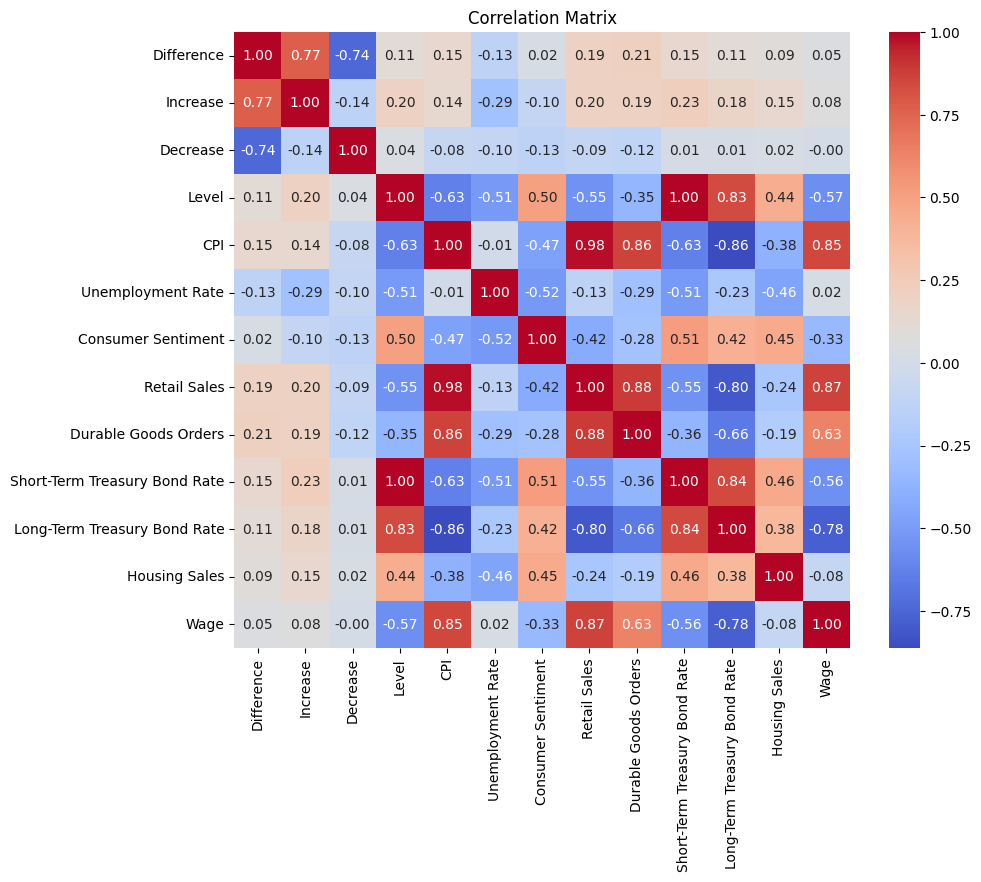

In [40]:
clean_data_numeric = clean_data.select_dtypes(include='number')
summary_stats = clean_data_numeric.describe()
print(summary_stats)
correlation_matrix = clean_data_numeric.corr()
print(correlation_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

       Difference    Increase    Decrease       Level         CPI  \
count   241.00000  241.000000  241.000000  241.000000  241.000000   
mean      0.01971    0.066390    0.046680    2.510373  208.510365   
std       0.22448    0.152244    0.144876    2.151646   40.584948   
min      -1.00000    0.000000    0.000000    0.250000  143.100000   
25%       0.00000    0.000000    0.000000    0.250000  173.600000   
50%       0.00000    0.000000    0.000000    1.750000  211.445000   
75%       0.00000    0.000000    0.000000    4.750000  237.761000   
max       0.75000    0.750000    1.000000    6.500000  302.918000   

       Unemployment Rate  Consumer Sentiment   Retail Sales  \
count         241.000000          241.000000     241.000000   
mean            5.703734           86.708714  328983.058091   
std             1.746695           13.348263  108840.128443   
min             3.400000           50.000000  156266.000000   
25%             4.400000           77.500000  249845.000000   


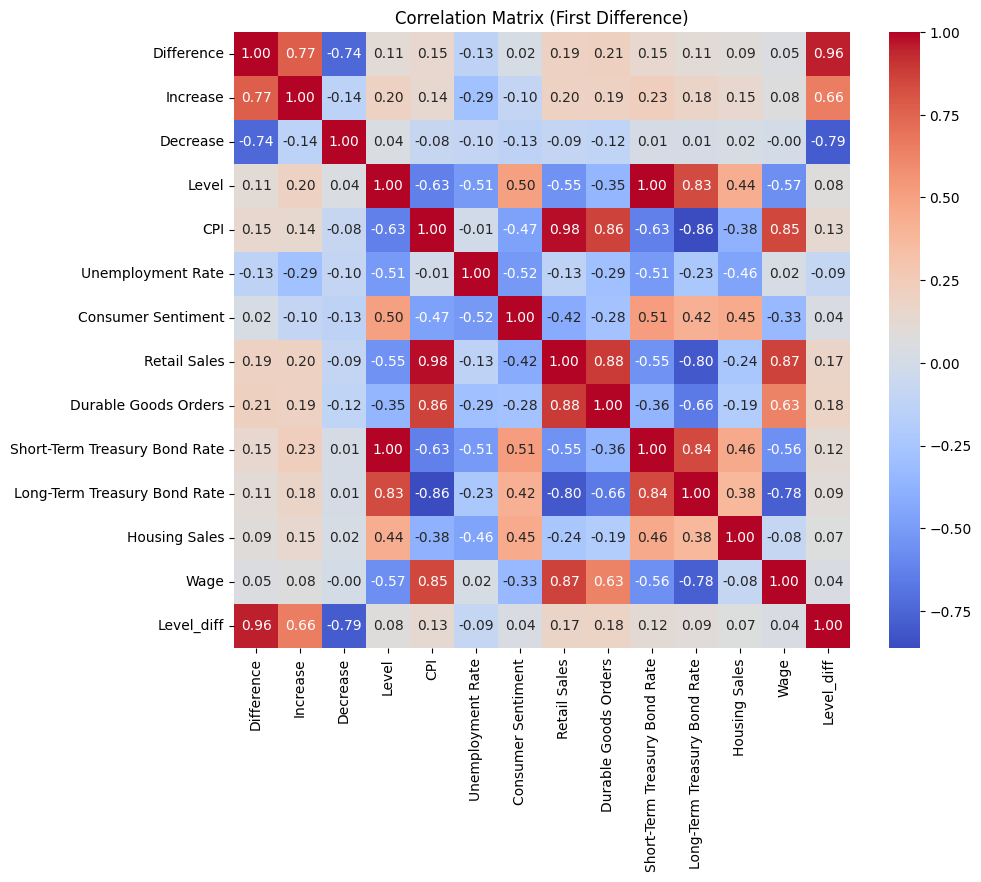

In [41]:
clean_data['Level_diff'] = clean_data['Level'].diff()
clean_data_numeric_diff = clean_data.select_dtypes(include='number')
summary_stats_diff = clean_data_numeric_diff.describe()
print(summary_stats_diff)
correlation_matrix_diff = clean_data_numeric_diff.corr()
print(correlation_matrix_diff)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_diff, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix (First Difference)')
plt.show()

In [42]:
clean_data.to_csv(r'C:\Users\abact\BC-Project\data\clean_data.csv', index=False)